In [100]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

AIM:To predict the price of house based on all input labels provided using single variate regression

#imported the boston dataset from scikit 
from sklearn.datasets import load_boston

In [108]:
boston=load_boston()

In [109]:
print boston.DESCR

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0,0.5,'Number of houses')

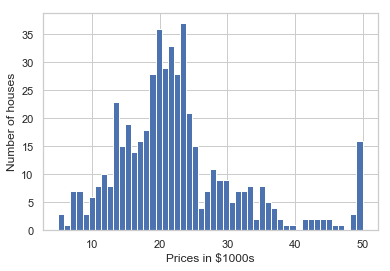

In [110]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

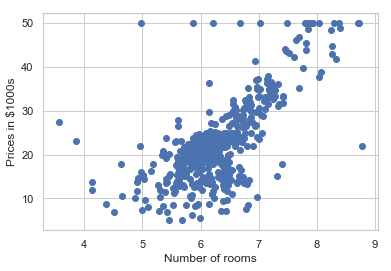

In [111]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Prices in $1000s')
plt.xlabel('Number of rooms')

In [112]:
boston_df=DataFrame(boston.data)

boston_df.columns= boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [113]:
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


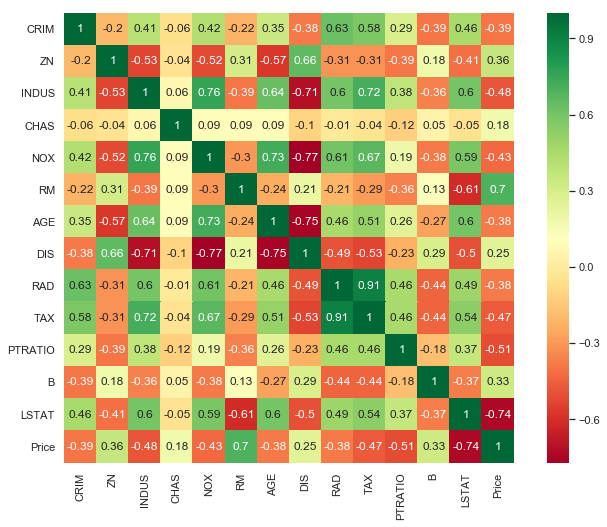

In [75]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston_df.corr().round(2), square=True, cmap='RdYlGn', annot=True)

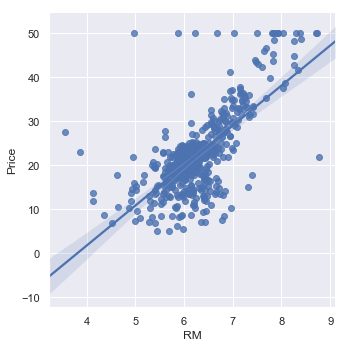

In [76]:
sns.lmplot('RM','Price',data=boston_df)

In [77]:
boston_df = boston_df.loc[:,['LSTAT','Price']]
boston_df.head(5)

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


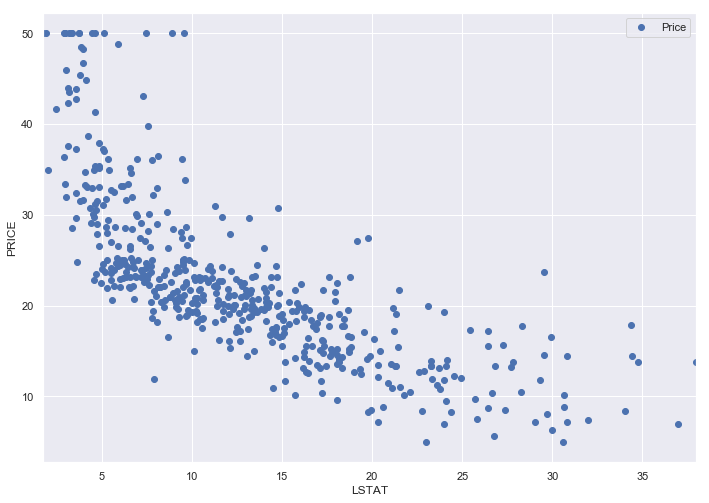

In [78]:
#where more no. of lower class people give prices is low
boston_df.plot(x='LSTAT', y='Price',style='o')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

In [79]:
X=DataFrame(boston_df['LSTAT'])
y=DataFrame(boston_df['Price'])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
#Now, let’s apply linear regression to Boston Housing Dataset and for that first, we will split the data into 
#training and testing sets. We train the model with 70% of the data and test with the remaining 30%.


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [82]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [83]:
#We have imported Linear regression from sklearn.linear_models as shown at the start of the post. 
#Now first instantiate the LinearRegression() and then use .fit() to fit a linear regression and then predict the price,
#using .predict() as shown below:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
print (reg.intercept_)

[34.33497839]


In [85]:
print (reg.coef_)

[[-0.92441715]]


In [86]:
y_test.head()

,Price
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [87]:
y_pred = reg.predict(X_test)

In [88]:
y_pred[1:6]

array([[27.69766325],
       [16.95593597],
       [26.84719947],
       [24.91516763],
       [24.05545968]])

Text(0,0.5,'predicted value')

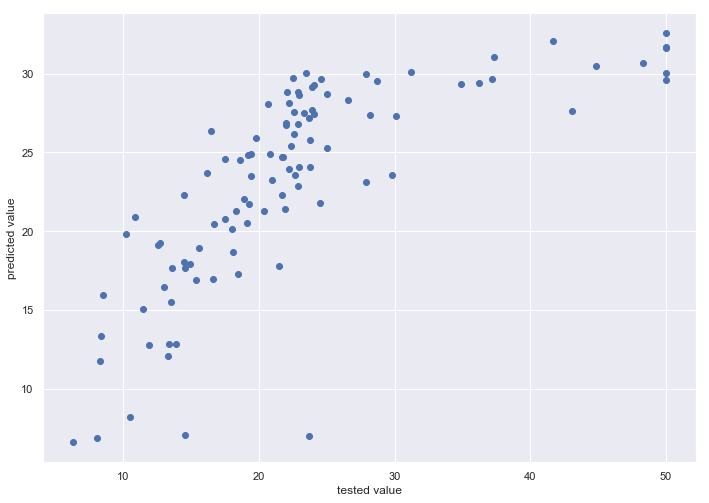

In [89]:
plt.scatter(y_test,y_pred)
plt.xlabel('tested value')
plt.ylabel('predicted value')

AIM: To implement multivariate regression using same technique

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
boston=load_boston()

In [141]:
boston_df=DataFrame(boston.data)

boston_df.columns= boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [142]:
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [143]:
import sklearn
from sklearn.linear_model import LinearRegression 

In [144]:
lreg = LinearRegression()

In [145]:
#lreg.fit() fits the linear model i.e the 70%
#lreg.predict() is used to predict the Y using lin model with estimators i.e 30% 
#lreg.score() return coeff of determintaion (r^2). A measure of how well observed values are replicated by model

X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [146]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [147]:
print (lreg.intercept_)

36.45948838509015


In [148]:
print 'the no of coeff is %d ' %len(lreg.coef_)

the no of coeff is 13 


In [149]:
#this suggests that RM is highly related and most linear relation with price determination
#set a df from features.coeff estm is the coefficient of all the features
coeff_df=DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [150]:
#30% in test and 70% in training sets
X_train,X_test,Y_train,Y_test = train_test_split(X,boston_df.Price)

In [151]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(379, 1)
(127, 1)
(404, 1)
(102, 1)


In [152]:
lreg=LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
#ran a prediction 
pred_tr = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [154]:
# Y_train-pred_tr is the actual diff btw actual and predicted data=D
print 'Fit a model X_train and calculate the MSE with Y_train: %.2f' %np.mean((Y_train-pred_tr)**2)

print 'Fit model X_train and calc MSE with X_test and Y_test :%.2f' %np.mean((Y_test-pred_test)**2)

Fit a model X_train and calculate the MSE with Y_train: 41.40
Fit model X_train and calc MSE with X_test and Y_test :29.80


residual plot : 
residual = observed value - predicted value

Text(0.5,1,'Residual Plot')

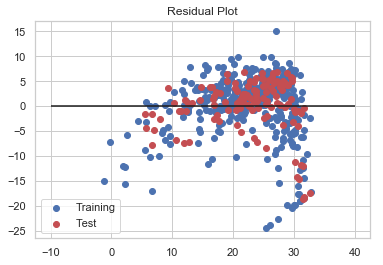

In [155]:
#scatter plot of train data
train = plt.scatter(pred_tr,(pred_tr-Y_train),c='b',alpha=1)

#scatter plot of test data
test=  plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=1)

#plot horizontal lines
plt.hlines(y=0,xmin=-10,xmax=40)

#labels
plt.legend((train,test),('Training','Test'), loc='lower left')

plt.title('Residual Plot')

Thus regression was a better choice as most of the points are around the horizntal line 